# COVID data for three countries

COVID-19 confirmed cases will be imported for three countries (India, Germany and Italy) 

In [1]:
import pandas as pd
import numpy as np
import missingno as mno

pd.set_option('display.max_rows',None)

ModuleNotFoundError: No module named 'missingno'

# Importing Data from Github

In [ ]:
path='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
raw_list=pd.read_csv(path,sep=',')

# Creating covid infectors (total cases/population) column in the data frame 

In [ ]:
raw_list['covid infectors']=raw_list['total_cases']/raw_list['population']
df_country_list=raw_list.iloc[:,2::]
df_country_list.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,covid infectors
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.255164e-07
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.255164e-07
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.255164e-07
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.255164e-07
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.255164e-07


In [ ]:
#df_country_list.dtypes
#df_country_list.fillna(0,inplace=True)

# Manipulating the data to have countries on each Column from Rows with 

In [ ]:
df_test0=pd.crosstab(df_country_list['date'],df_country_list['location'],values=df_country_list['covid infectors'],aggfunc=np.mean)

In [ ]:
df_final=df_test0[['India','Germany','Italy']].dropna()
df_final.head()

location,India,Germany,Italy
date,,,
2020-01-31,7.176644e-10,5.959442e-08,3.313043e-08
2020-02-01,7.176644e-10,9.535107e-08,3.313043e-08
2020-02-02,1.435329e-09,1.191888e-07,3.313043e-08
2020-02-03,2.152993e-09,1.430266e-07,3.313043e-08
2020-02-04,2.152993e-09,1.430266e-07,3.313043e-08


In [ ]:
df_final.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_final.shape

(877, 3)

<AxesSubplot:xlabel='date'>

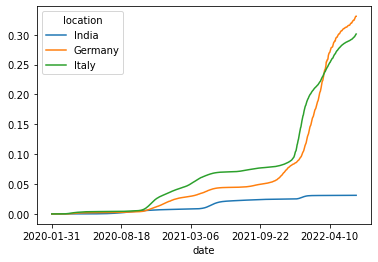

In [ ]:
%matplotlib inline
df_final.plot()

In [ ]:
a=df_country_list.groupby(['date','location']).count()
a.total_cases.unique()

array([1])

In [ ]:
df_country_list.iloc[:,65:66]

,covid infectors
0,1.255164e-07
1,1.255164e-07
2,1.255164e-07
3,1.255164e-07
4,1.255164e-07
...,...
196769,1.689081e-02
196770,1.689942e-02
196771,1.690519e-02
196772,1.691665e-02


In [ ]:
df_test1=df_country_list[['date']].set_index('date')
country_list=['Ialy', 'India', 'Germany']
for each in country_list:
    df_test1[each]=df_country_list[df_country_list['location']==each].iloc[:,65:66]
df_test1

,Ialy,India,Germany
date,,,
2020-02-24,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN
...,...,...,...
2022-06-21,NaN,NaN,NaN
2022-06-22,NaN,NaN,NaN
2022-06-23,NaN,NaN,NaN


In [ ]:
df_plot=df_country_list.iloc[:,1:2]
#df_plot.set_index('date')
df_plot.set_index('date')

""
date
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
...
2022-06-21
2022-06-22
2022-06-23


In [ ]:
##df_test['India']=df_country_list[df_country_list['location']=='India'].iloc[:,65:66]



##df_test

,date,India
0,2020-02-24,NaN
1,2020-02-25,NaN
2,2020-02-26,NaN
3,2020-02-27,NaN
4,2020-02-28,NaN
...,...,...
196769,2022-06-21,NaN
196770,2022-06-22,NaN
196771,2022-06-23,NaN
196772,2022-06-24,NaN


In [ ]:
country_list=['Ialy', 'India', 'Germany']
for each in country_list:
    df_plot[each]=df_country_list[df_country_list["location"]==each]

df_plot

ValueError: Expected a 1D array, got an array with shape (196774, 66)

In [ ]:
df_IN=df_country_list[df_country_list["location"]=="India"].iloc[:,2:4]
df_GER=df_country_list[df_country_list["location"]=="Germany"].iloc[:,2:]
df_IT=df_country_list[df_country_list["location"]=="Italy"].iloc[:,2:]
df_country_list['covid_infectors']=df_country_list['total_cases']/df_country_list['population']
len(df_country_list.columns[:])

67